In [ ]:
import load_data as ld
from pathlib import Path
import pickle
import pandas as pd
from slope_calculation import *

In [ ]:
parent_folder = Path(os.getcwd()).parent.absolute()

data_path = os.path.join(parent_folder, "Data/EPOGH/Strain curves (Filtered)")
save_data_path = os.path.join(parent_folder, "Results/SOM/EPOGH/")

if not os.path.exists(save_data_path):
    os.makedirs(save_data_path)

avc_files = ["Data/EPOGH/EPOGH_AVC.xlsx"]

In [ ]:
original_data, data, patient_id, interval = ld.read_data(data_path)
excluded_patients1, avc_times = ld.read_avc_time(parent_folder, avc_files)
excluded_patients2 = []
p_wave_times = pd.DataFrame(columns=["ID", "PQ Interval", "P duration (ms)"])

original_data, data, patient_id, interval = exclude_patients(excluded_patients1, excluded_patients2, original_data,
                                                             data, patient_id, interval)
decision = "peak"
aligned_ecg, deformation, reference_index, normalized_time, reference_time = get_aligned_signals(original_data,
                                                                                                 decision, interval,
                                                                                                 patient_id, avc_times,
                                                                                                 p_wave_times)

deformation = np.array(deformation)

In [4]:
#load the saved som model
clustering_model = pickle.load(open(os.path.join(parent_folder, "Results/SOM/som.p"), 'rb'))
winner_coordinates = np.array([clustering_model.winner(x) for x in deformation]).T
clusters = np.ravel_multi_index(winner_coordinates, (5,1))

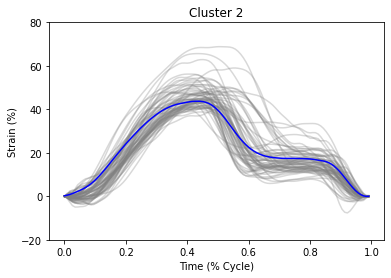

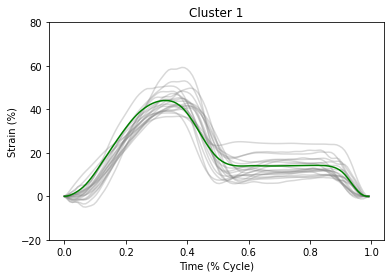

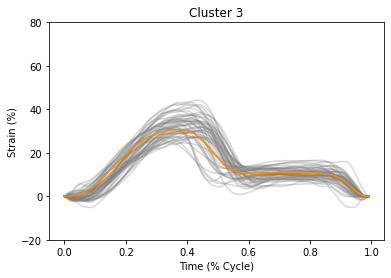

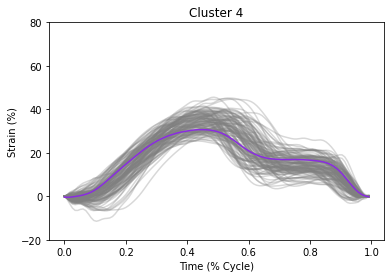

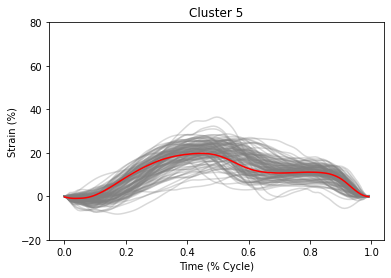

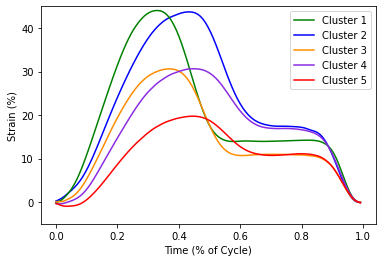

C:\Users\vagge\Desktop\Deformation Curves\SOM\utils.py:146: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

C:\Users\vagge\Desktop\Deformation Curves\SOM\utils.py:155: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

100%|██████████| 379/379 [00:22<00:00, 17.08it/s]


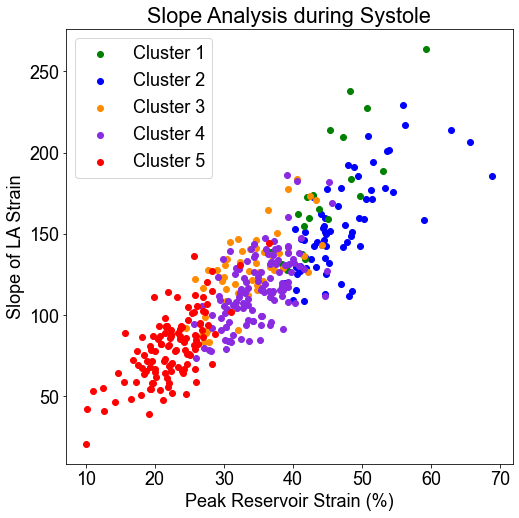

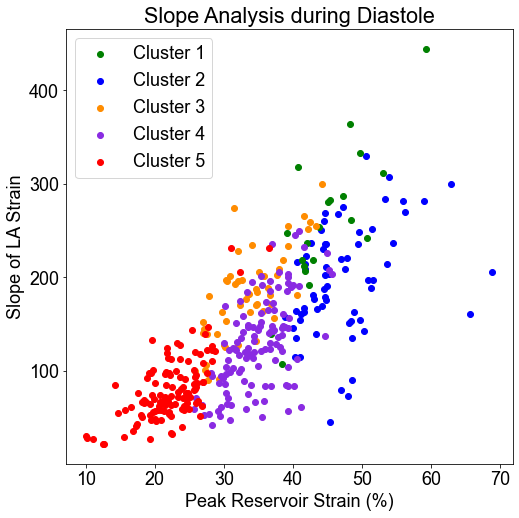

In [5]:
# groups the patients' ids per cluster. Returns a list
clustered_id = analyze_patient(clusters, patient_id)

# writes an excel file with the patient's ID and its assigned cluster label
write2excel(clusters, patient_id, save_data_path)

# plots the strain traces grouped per cluster with Matplotlib and plotly. Matplotlib produces png and svg files.
visualize_clustering_results(clustering_model, reference_time, deformation, clustered_id,
                             clusters, patient_id, save_data_path)

# plots the gradient of the Strain traces with Matplotlib and plotly.
plot_gradients(deformation, reference_time, clusters, clustered_id, patient_id, save_data_path)

# calculate the slopes of the strain curves by fitting a linear Regression model
systolic, diastolic = calculate_slopes(deformation, reference_time, patient_id, save_data_path)

# plots the slopes of the Strain traces
plot_slopes(deformation, clusters, clustered_id, patient_id, systolic, diastolic, save_data_path)